In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',33)

In [7]:
#df_mat = pd.read_pickle('df_mat.pkl')

#df_mat.head()
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## G3 

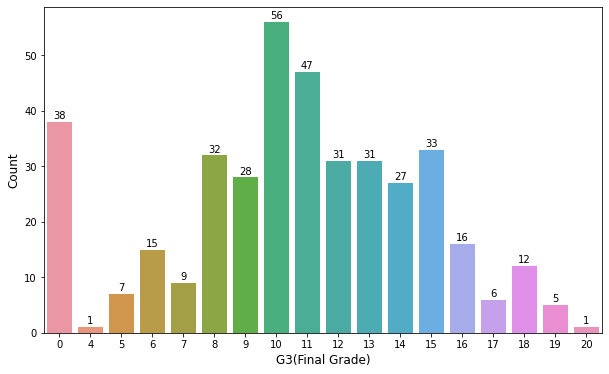

In [8]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

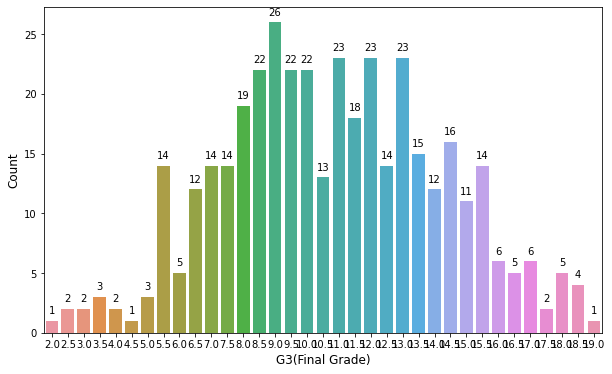

In [77]:
df_mat["G12"] = (df_mat["G1"]+df_mat["G2"])/2

if df_mat["G3"] 

plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G12'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [9]:
df_mat['G3'].value_counts().sort_index(ascending = False)

20     1
19     5
18    12
17     6
16    16
15    33
14    27
13    31
12    31
11    47
10    56
9     28
8     32
7      9
6     15
5      7
4      1
0     38
Name: G3, dtype: int64

In [10]:
print('The Median of G3(Final Grade) is: {}'.format(round(df_mat['G3'].median(),2)))
print('The Mean of G3(Final Grade) is: {}'.format(round(df_mat['G3'].mean(),2)))

The Median of G3(Final Grade) is: 11.0
The Mean of G3(Final Grade) is: 10.42


In [11]:
df_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

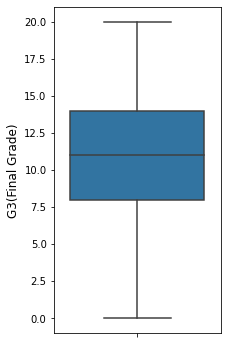

In [12]:
plt.figure(figsize = (3,6))
sns.boxplot(df_mat['G3'],orient = 'v')
plt.ylabel('G3(Final Grade)',fontsize = 12);

## school

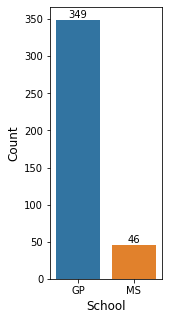

In [13]:
plt.figure(figsize = (2,5))
ax = sns.countplot(df_mat['school'])
plt.xlabel('School',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 3,p.get_height(),ha = 'center')

## Influencia de la Localización del Domicilio

In [14]:
df_mat_place = df_mat[['school','address','traveltime','G3']]

df_mat_place.head()

,school,address,traveltime,G3
0,GP,U,2,6
1,GP,U,1,6
2,GP,U,1,10
3,GP,U,1,15
4,GP,U,1,10


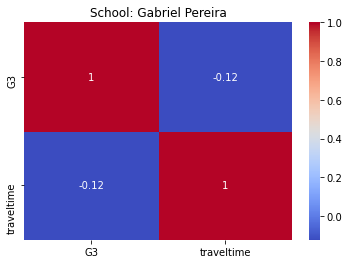

In [15]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'GP'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Gabriel Pereira');

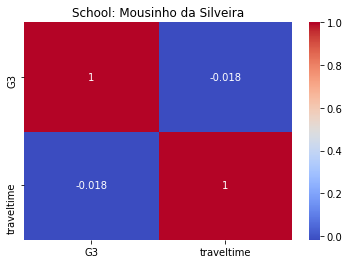

In [16]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'MS'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Mousinho da Silveira');

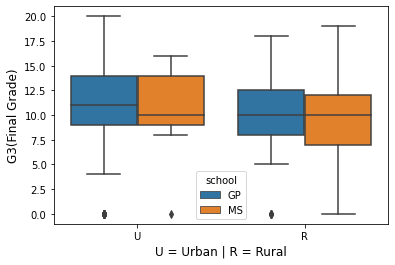

In [17]:
sns.boxplot(data = df_mat_place,x = 'address',y = 'G3',hue = 'school')
plt.xlabel('U = Urban | R = Rural',fontsize = 12)
plt.ylabel('G3(Final Grade)',fontsize = 12);

## A partir de aquí

In [0]:
df_mat_histograms = df_mat.drop('G3',axis = 1)

In [19]:
df_mat.shape

(395, 33)

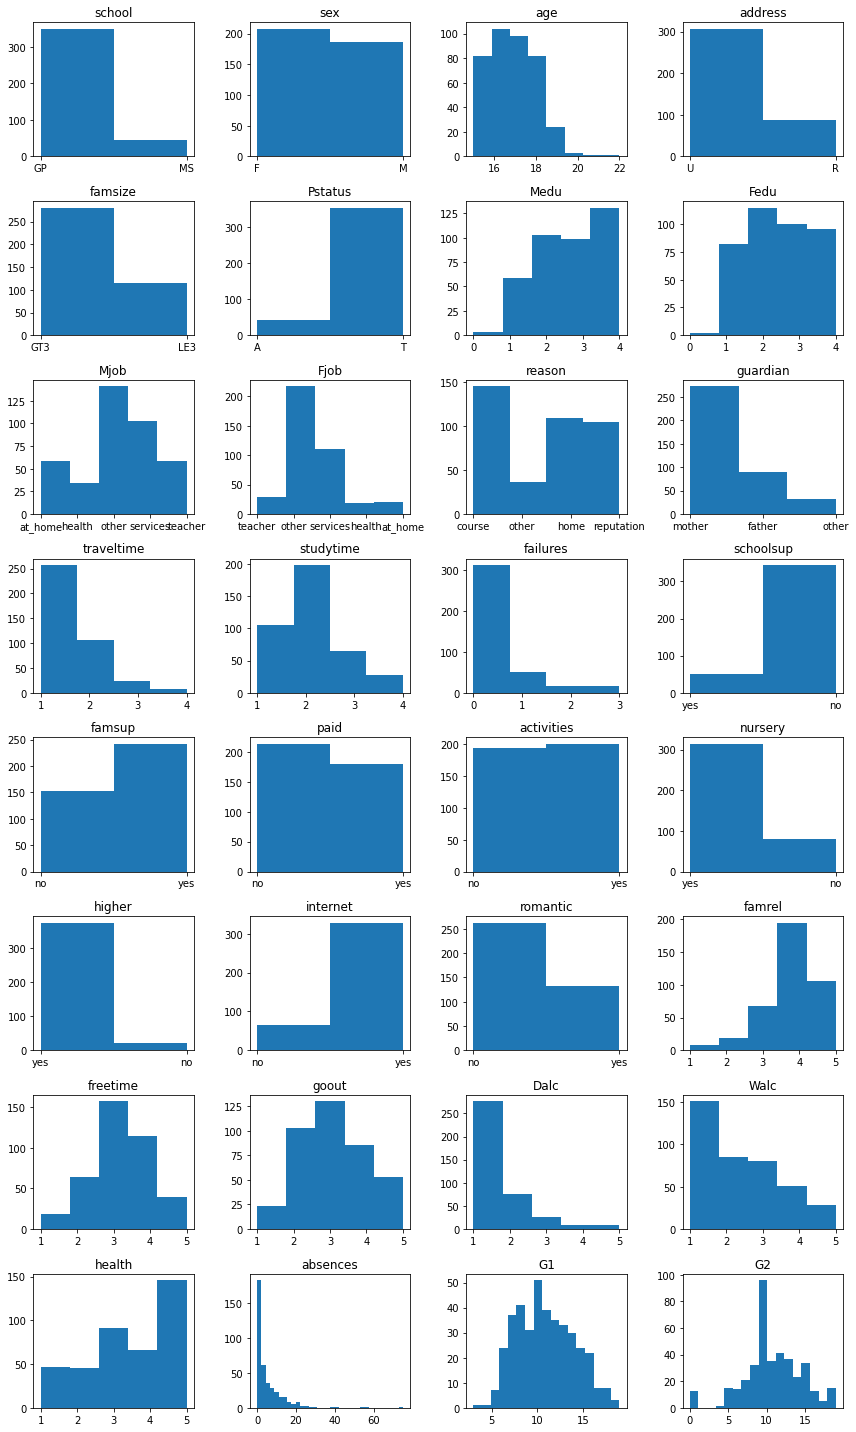

In [20]:
fig = plt.figure(figsize = (12,20))
for i in range(1,df_mat_histograms.shape[1] + 1):
    plt.subplot(8,4,i)
    ax = plt.gca()
    ax.set_title(df_mat_histograms.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_mat_histograms.iloc[:,i - 1].unique())
    plt.hist(df_mat_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

In [21]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [0]:
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [24]:
df_mat.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [25]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


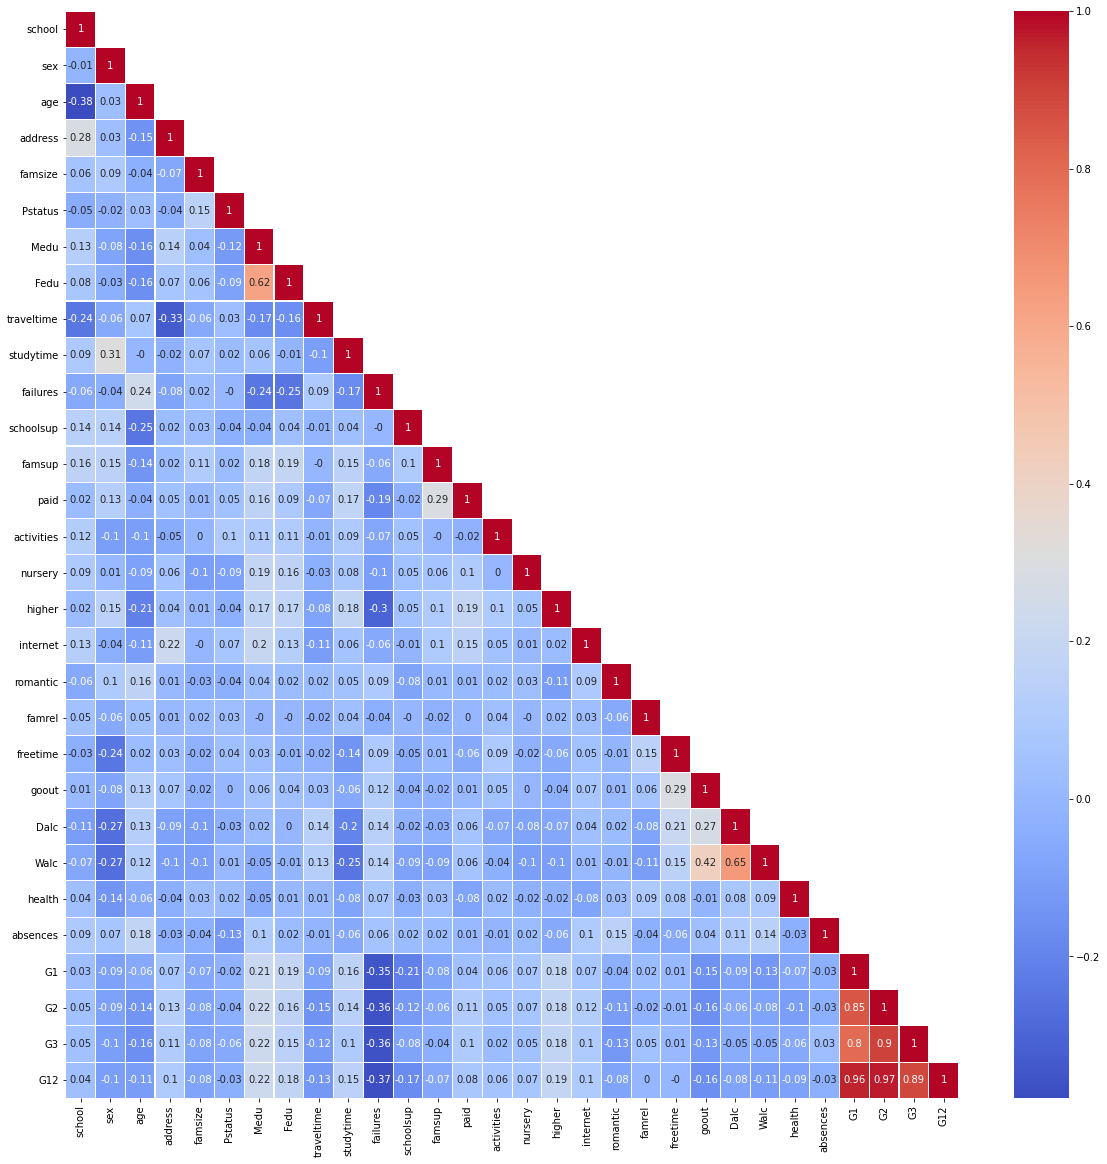

In [78]:
df_corr = df_mat.corr().round(2)

mask = np.ones(df_corr.shape,dtype = bool)
mask[np.tril_indices_from(mask)] = False

f,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(df_corr,mask = mask,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([30,0]);

In [0]:
categorical_feats = df_mat.dtypes[df_mat.dtypes == 'object'].index
df_corr = df_mat.drop(categorical_feats,axis = 1)

In [0]:
def print_correlation_table(df_corr, variable):
    correlation_abs = round(df_corr.corr()[variable].abs(),2)
    correlation_type = df_corr.corr()[variable].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
    correlation = pd.concat([correlation_abs,correlation_type],axis = 1,keys = ['correlation','type'])
    correlation = correlation.sort_values('correlation',ascending = False)
    return correlation

In [81]:
print_correlation_table(df_corr, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G12,0.89,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg


In [30]:
df_mat["guardian"].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [0]:
one_hot_Mjob = pd.get_dummies(df_mat['Mjob'])

In [32]:
one_hot_Mjob

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
390,0,0,0,1,0
391,0,0,0,1,0
392,0,0,1,0,0
393,0,0,0,1,0


In [0]:
#for i in ["at_home", "health", "other", "services", "teacher"]:
#    print(one_hot_Mjob[i].value_counts())

In [0]:
one_hot_Mjob = one_hot_Mjob.drop(columns = "health")

In [0]:
one_hot_Mjob = one_hot_Mjob.rename(columns={"at_home": "Mjob_at_home", "other": "Mjob_other", "services": "Mjob_services", "teacher": "Mjob_teacher"})

In [36]:
one_hot_Mjob

,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
390,0,0,1,0
391,0,0,1,0
392,0,1,0,0
393,0,0,1,0


In [37]:
df_mat_temp = pd.concat([df_mat, one_hot_Mjob], axis=1)

df_mat_temp.drop(columns = "Mjob")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,1,18,1,1,0,4,4,teacher,course,mother,2,2,0,1,0,...,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0
1,1,1,17,1,1,1,1,1,other,course,father,1,2,0,0,1,...,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0
2,1,1,15,1,0,1,1,1,other,other,mother,1,2,3,1,0,...,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0
3,1,1,15,1,1,1,4,2,services,home,mother,1,3,0,0,1,...,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0
4,1,1,16,1,1,1,3,3,other,home,father,1,2,0,0,1,...,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,services,course,other,1,2,2,0,1,...,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0
391,0,0,17,1,0,1,3,1,services,course,mother,2,1,0,0,0,...,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0
392,0,0,21,0,1,1,1,1,other,course,other,1,1,3,0,0,...,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0
393,0,0,18,0,0,1,3,2,other,course,mother,3,1,0,0,0,...,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0


In [0]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [0]:
df_mat_one_hot = one_hot(df_mat, ["Mjob", "Fjob", "reason", "guardian"])
#quitar columnas originales (categóricas)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])
#quitar una columna de one hot de cada una de las variables para reducir la colinearidad (hace falta ver 
#cuál se quiere quitar en cada caso)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob_health", "Fjob_health", "guardian_other", "reason_other"])

In [40]:
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,...,5,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,...,5,5,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,...,7,8,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,...,15,14,15,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,...,6,10,10,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,...,9,9,9,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,...,14,16,16,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,...,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,...,11,12,10,0,0,1,0,0,1,0,0,1,0,0,0,1


In [41]:
#print_correlation_table(df_mat_one_hot, 'Mjob_at_home')
#print_correlation_table(df_mat_one_hot, 'Mjob_other')
#print_correlation_table(df_mat_one_hot, 'Mjob_services')
#print_correlation_table(df_mat_one_hot, 'Mjob_teacher')
print_correlation_table(df_mat_one_hot, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


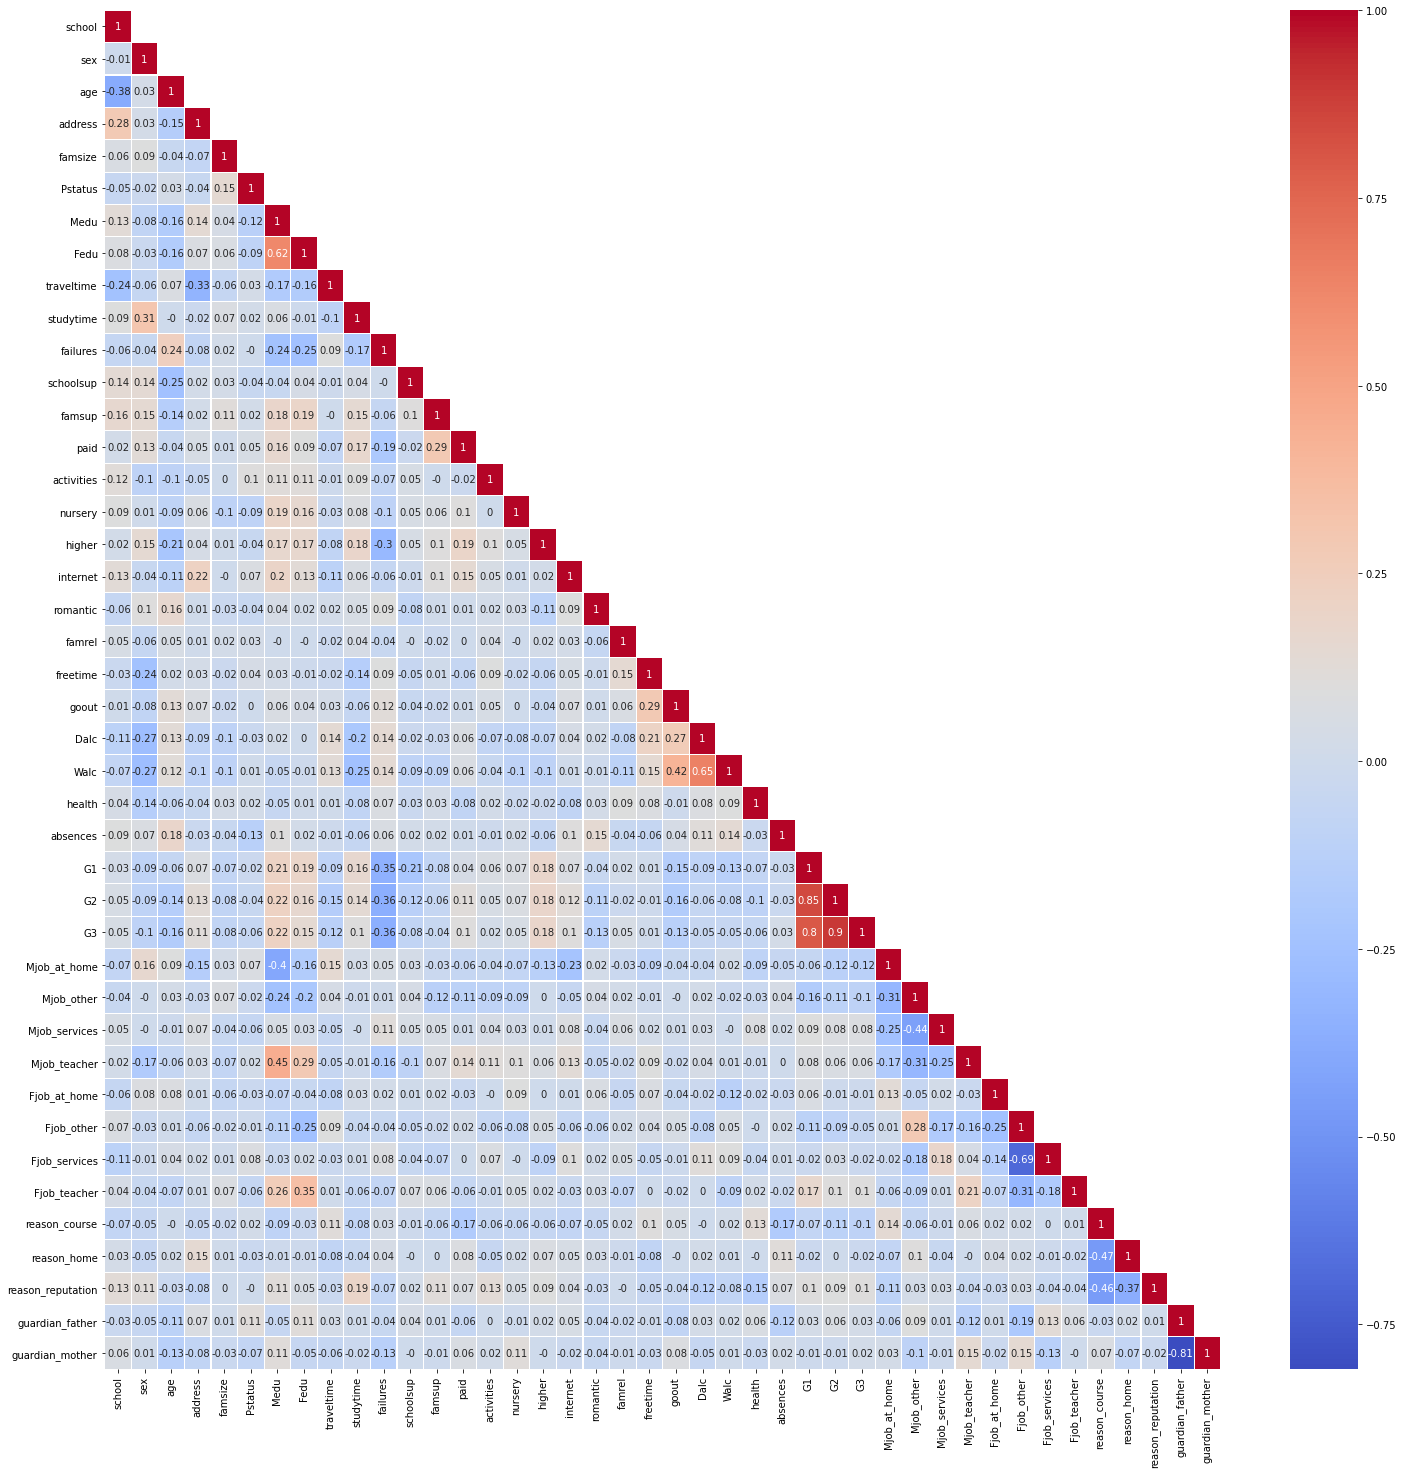

In [42]:
df_corr_oh = df_mat_one_hot.corr().round(2)


mask_oh = np.ones(df_corr_oh.shape,dtype = bool)
mask_oh[np.tril_indices_from(mask_oh)] = False



f,ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(df_corr_oh,mask = mask_oh,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([42,0]);

In [43]:
df_mat["Fjob"].value_counts(normalize = True)

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64

In [44]:
df_mat_one_hot.shape

(395, 42)

In [0]:
df_mat_one_hot = df_mat_one_hot.drop(columns = ["G1", "G2"])

In [46]:
df_mat_one_hot.drop(columns = ["G3"]).columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother'],
      dtype='object')

In [47]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = df_mat_one_hot.drop(columns = ["G3"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              51.28
Date:                Sat, 21 Mar 2020   Prob (F-statistic):                   9.30e-105
Time:                        08:53:38   Log-Likelihood:                         -881.70
No. Observations:                 316   AIC:                                      1841.
Df Residuals:                     277   BIC:                                      1988.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [0]:
#model1.get_prediction(exog = X_test).summary()

In [49]:
# Get predictions for the test data
y_pred_test = model1.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 4.298


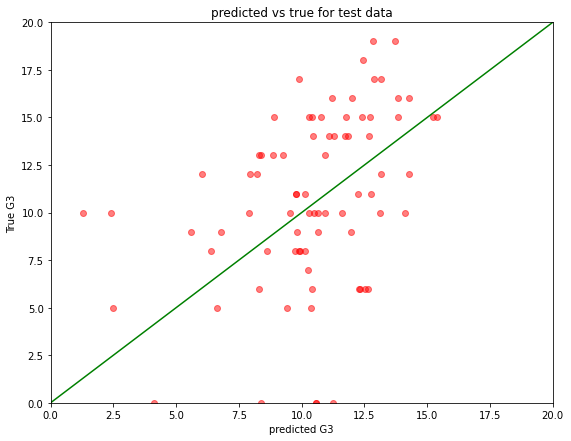

In [50]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [0]:
df_mat_comparison = df_mat_one_hot

In [52]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              216.2
Date:                Sat, 21 Mar 2020   Prob (F-statistic):                   3.22e-127
Time:                        08:53:39   Log-Likelihood:                         -899.61
No. Observations:                 316   AIC:                                      1817.
Df Residuals:                     307   BIC:                                      1851.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

root mean squared error on test data: 4.298


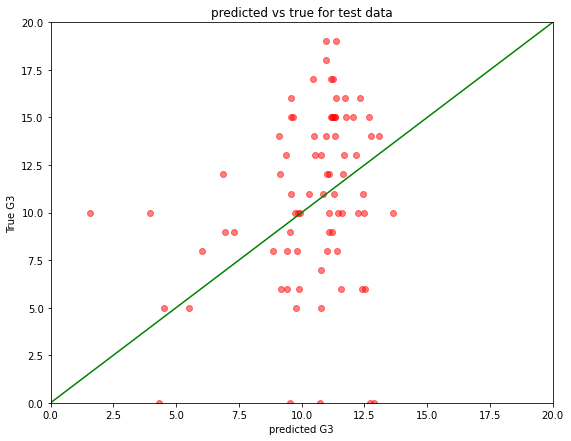

In [53]:
# Get predictions for the test data
y_pred_test_2 = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_2, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [54]:

# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences",  "romantic", "higher",  "failures", "studytime", "age", "sex"]
#"Mjob_teacher", "goout","famsup",
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              277.6
Date:                Sat, 21 Mar 2020   Prob (F-statistic):                   3.38e-129
Time:                        08:53:39   Log-Likelihood:                         -900.72
No. Observations:                 316   AIC:                                      1815.
Df Residuals:                     309   BIC:                                      1842.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test_2)):.4}')
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')

root mean squared error on test data: 4.515
root mean squared error on test data: 4.298


root mean squared error on test data: 4.298


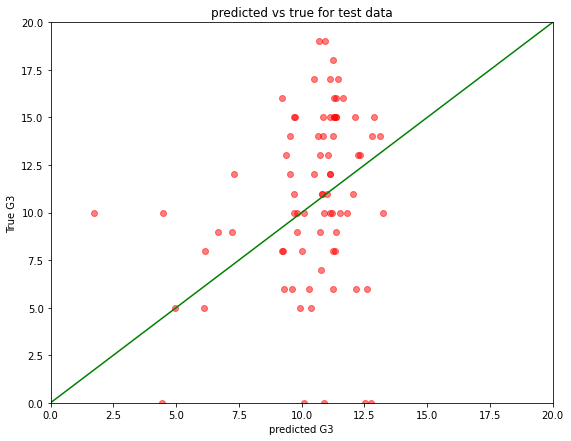

In [56]:
# Get predictions for the test data
y_pred_test_3 = model3.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_3, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

# Quitar los 0's y reemplazarlos por la media de G1 y G2

In [0]:
df_mat['G3New'] = np.where((df_mat['G3'] == 0 ), #For rows with G3 == 0 
                           df_mat['G12'].apply(np.floor),      #We place rounded down "G12" values
                           df_mat['G3'])      #In column "G3"

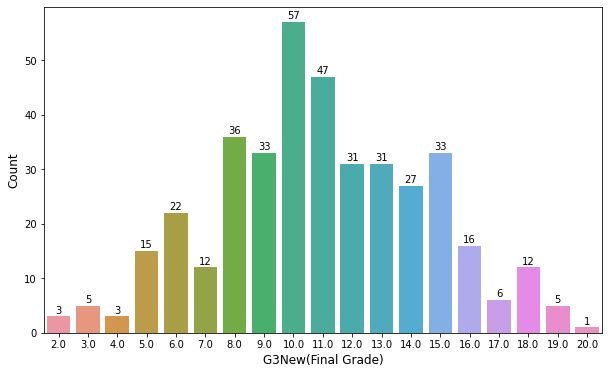

In [228]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3New'])
plt.xlabel('G3New(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

# Probar con rangos de notas


In [82]:
df_mat["G3"].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [272]:
#for scalefactor in range(1,11):
  scalefactor =3
  #df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: x/scalefactor)
  df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: math.floor(x/scalefactor))


  df_mat_one_hot["G3Bagged"] = df_mat["G3Bagged"]
  # Define our dependent variable
  y_column = 'G3Bagged'
  y = df_mat_one_hot[y_column]
  # Define  our independent variables
  x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
  #x_columns = df_mat_one_hot.drop(columns = ["G3", "G3Bagged"]).columns
  X = df_mat_one_hot[x_columns]
  # Add an intercept term to the independent variables. This is needed in order to include the constant term from
  # linear regression equation.
  #X['cnst'] = 0
  # Split our data into training and test data sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model1Bagged = sm.OLS(endog = y_train,exog = X_train).fit()
  print(scalefactor, model1Bagged.rsquared)
  #print(model1Bagged.summary())

3 0.8946312375159468


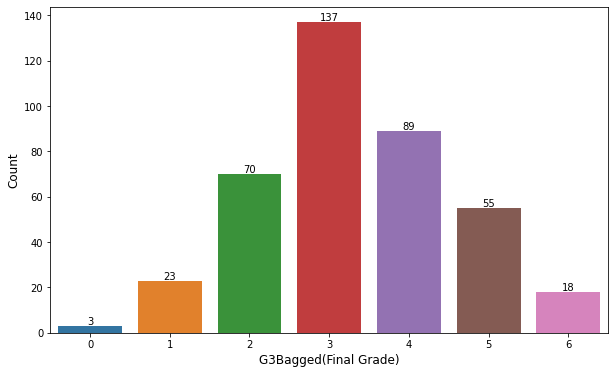

In [273]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3Bagged'])
plt.xlabel('G3Bagged(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [274]:
y_pred_test = model1Bagged.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 1.25


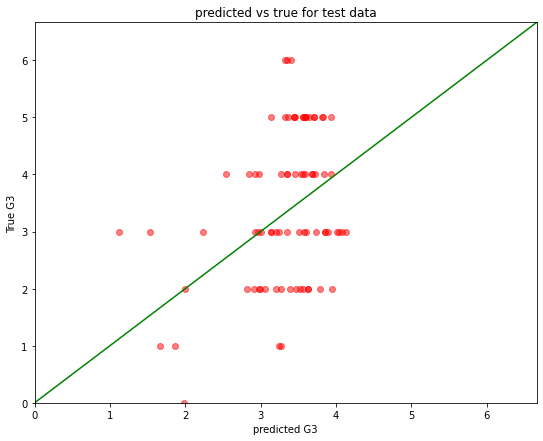

In [275]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [276]:
y_pred_test_bagged = y_pred_test.apply(lambda x: math.floor(x))
y_test_bagged = y_test.apply(lambda x: math.floor(x))
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test_bagged,y_pred_test_bagged)):.4}')


root mean squared error on test data: 1.414


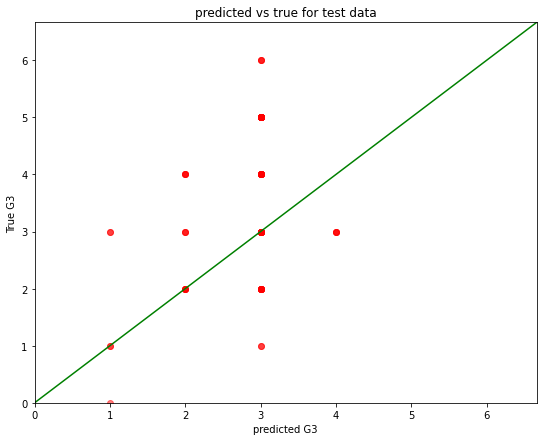

In [277]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_bagged, y_test_bagged, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [258]:
y_pred_test.describe()

count    79.000000
mean      0.697021
std       0.207598
min      -0.055817
25%       0.645315
50%       0.747911
75%       0.837957
max       0.975861
dtype: float64